In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from scipy.stats import chi2_contingency


warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="Spectral")

In [31]:
# importing data
costs_df = pd.read_csv('data/costs.csv')
profiles_df = pd.read_csv('data/profiles.csv')
verification_df = pd.read_csv('data/verification.csv')


# Data in a glance 

In [32]:
costs_df.head()

,country,whatsapp_usd,sms_usd
0,AC,0.043,0.107000
1,AD,0.043,0.130000
2,AE,0.026,0.063066
3,AF,0.040,0.180605
4,AG,0.043,0.108000


In [33]:
costs_df.shape

(228, 3)

In [34]:
costs_df.describe()

,whatsapp_usd,sms_usd
count,228.000000,228.000000
mean,0.043276,0.132274
std,0.005594,0.080146
min,0.026000,0.007600
25%,0.043000,0.068000
50%,0.043000,0.120000
75%,0.043000,0.171127
max,0.086000,0.440000


In [35]:
profiles_df.head()

,userID,gender,dob,country
0,mpr_2fOzSxcEMql0TQkeK2vGCuJBu9K,M,"25 Oct, 2005, 00:00",CA
1,mpr_2fIcL4JraEe6OMdD4xvfVIZiAx8,M,"10 Jun, 1978, 00:00",CA
2,mpr_2fHMFzUtfSXQORtB5anUIjuNQso,F,"15 Feb, 2002, 00:00",GB
3,mpr_2fHaKh68oUhLyEZwztVzaCHefQ9,F,"25 Aug, 2001, 00:00",FR
4,mpr_2fIJtYAsOQ8AqU402d8j5yEFLqt,M,"18 Apr, 1990, 00:00",FR


In [36]:
profiles_df.shape

(18424, 4)

In [37]:
profiles_df.describe()

,userID,gender,dob,country
count,18424,18424,18424,18421
unique,18424,2,7369,159
top,mpr_2fOzSxcEMql0TQkeK2vGCuJBu9K,M,"19 Apr, 2000, 00:00",MA
freq,1,11387,63,2037


In [38]:
verification_df.head()

,userID,group,method,verified
0,mpr_2fHOBr0Nw6mNM2fPIKMeSyKUP0e,B,Sms,0
1,mpr_2fHOmoydcZfjF0UdFEmDQQifYK1,C,Sms,1
2,mpr_2fHRBhLrWEOcfjjblwatVXbnxoN,B,Sms,1
3,mpr_2fHQGGdXwbv8902hxC9C1dt1ThN,A,Sms,1
4,mpr_2fHSJ6Yyz6VC06GVQFjXH9q7s6m,A,Sms,1


In [39]:
verification_df.shape

(18424, 4)

# Data Validation

In [40]:
missing_values = profiles_df.isnull().sum()
missing_values

userID     0
gender     0
dob        0
country    3
dtype: int64

In [41]:
profiles_df[profiles_df['country'].isnull()]

,userID,gender,dob,country
308,mpr_2fMRl7NrXhXuM8ahHKpUYYoq1qZ,M,"20 Dec, 2003, 00:00",NaN
10810,mpr_2fF489IMIBWqhDlQYzIzGrolOhM,F,"16 Apr, 1988, 00:00",NaN
11674,mpr_2fN0uUj3O9ywDBGrjtW1mNoU3si,M,"8 May, 1983, 00:00",NaN


In [42]:
print(verification_df[verification_df['userID'] == 'mpr_2fF489IMIBWqhDlQYzIzGrolOhM'])
print(verification_df[verification_df['userID'] == 'mpr_2fN0uUj3O9ywDBGrjtW1mNoU3si'])
print(verification_df[verification_df['userID'] == 'mpr_2fMRl7NrXhXuM8ahHKpUYYoq1qZ'])


                               userID group method  verified
3522  mpr_2fF489IMIBWqhDlQYzIzGrolOhM     A    Sms         0
                                userID group method  verified
12778  mpr_2fN0uUj3O9ywDBGrjtW1mNoU3si     A    Sms         0
                                userID group    method  verified
14921  mpr_2fMRl7NrXhXuM8ahHKpUYYoq1qZ     B  Whatsapp         1


In [43]:
profiles_df["dob"] = pd.to_datetime(profiles_df['dob']).dt.strftime("%Y-%m-%d")
profiles_df['dob'] = pd.to_datetime(profiles_df['dob'], errors='coerce')
profiles_df["dob"].head()

0   2005-10-25
1   1978-06-10
2   2002-02-15
3   2001-08-25
4   1990-04-18
Name: dob, dtype: datetime64[ns]

In [44]:
merged_df = pd.merge(profiles_df, verification_df, on='userID', how='inner')
merged_df.shape

(18424, 7)

In [45]:
merged_df

,userID,gender,dob,country,group,method,verified
0,mpr_2fOzSxcEMql0TQkeK2vGCuJBu9K,M,2005-10-25,CA,A,Sms,1
1,mpr_2fIcL4JraEe6OMdD4xvfVIZiAx8,M,1978-06-10,CA,C,Whatsapp,1
2,mpr_2fHMFzUtfSXQORtB5anUIjuNQso,F,2002-02-15,GB,A,Sms,1
3,mpr_2fHaKh68oUhLyEZwztVzaCHefQ9,F,2001-08-25,FR,C,Whatsapp,1
4,mpr_2fIJtYAsOQ8AqU402d8j5yEFLqt,M,1990-04-18,FR,B,Sms,1
...,...,...,...,...,...,...,...
18419,mpr_2fNcYCR0mQkxFQk3Ec7iGxlqIfm,M,1994-04-21,GB,C,Whatsapp,1
18420,mpr_2fMhNj8A3PCNVrCO96nddRNXMOy,M,1983-12-03,FR,B,Sms,1
18421,mpr_2fMvy8DguUmyKMAic4dkmGMgmdO,M,2006-04-20,SO,B,Sms,1
18422,mpr_2fN7KDgT4uZwKJBUVSDt1bk5Ctj,M,1996-04-14,US,B,Sms,1


In [46]:
melted_costs_df = costs_df.melt(id_vars=['country'], var_name='method', value_name='cost')

In [47]:
# change 'whatsapp and sms _used' to 'whatsapp' and 'Sms' in 'method' column
melted_costs_df['method'] = melted_costs_df['method'].replace({'whatsapp_usd': 'Whatsapp'})
melted_costs_df['method'] = melted_costs_df['method'].replace({'sms_usd': 'Sms'})

In [48]:
merged_df = pd.merge(merged_df, melted_costs_df, on= ['method','country'], how='left')

# Feature engineering

In [49]:
merged_df['age'] = 2024 - merged_df['dob'].dt.year

merged_df['age_group'] = pd.cut(merged_df['age'], bins=[16, 22, 27, 32, 44, 54,130])


# Data Visualisation 

<BarContainer object of 2 artists>

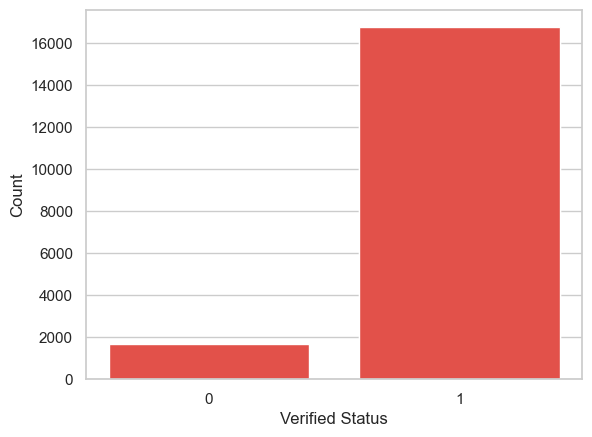

In [50]:
sns.countplot(x='verified', data=merged_df)
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.bar(merged_df['verified'].value_counts().index,
        merged_df['verified'].value_counts().values)

In [51]:
merged_df['verified'].value_counts(normalize=True)

verified
1    0.90914
0    0.09086
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries by Count')

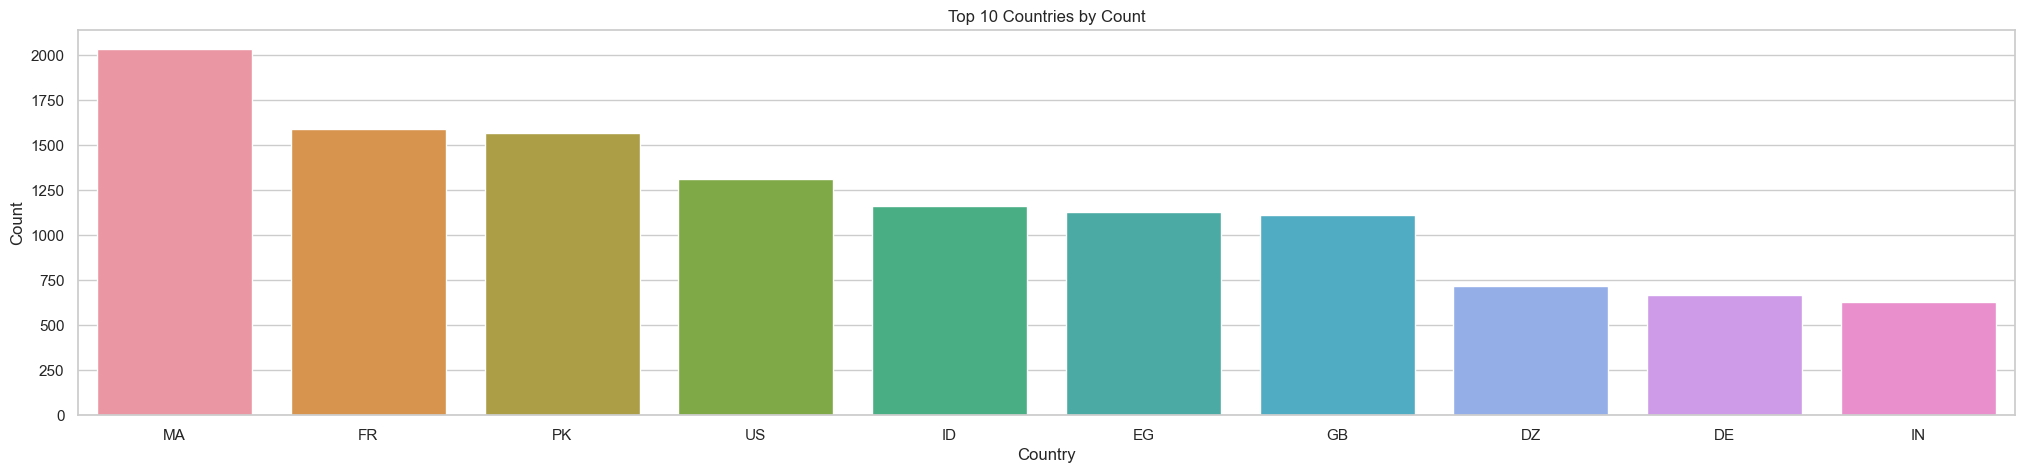

In [52]:
plt.figure(figsize=(25,5))

top_countries = merged_df['country'].value_counts().nlargest(10).index
filtered_df = merged_df[merged_df['country'].isin(top_countries)]

# plot
sns.countplot(
    x='country',
    data=filtered_df,
    order=top_countries  # ensures correct order
)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count')


<BarContainer object of 2 artists>

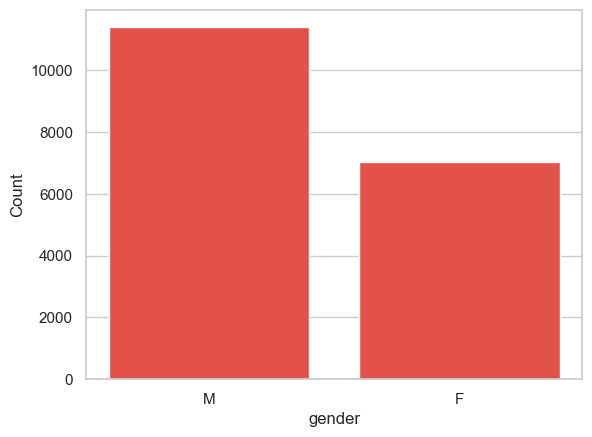

In [53]:
sns.countplot(x='gender', data=merged_df)
plt.xlabel('gender')
plt.ylabel('Count')
plt.bar(merged_df['gender'].value_counts().index,
        merged_df['gender'].value_counts().values)

In [54]:
merged_df['gender'].value_counts(normalize=True)

gender
M    0.618053
F    0.381947
Name: proportion, dtype: float64

Text(0.5, 0, 'Age')

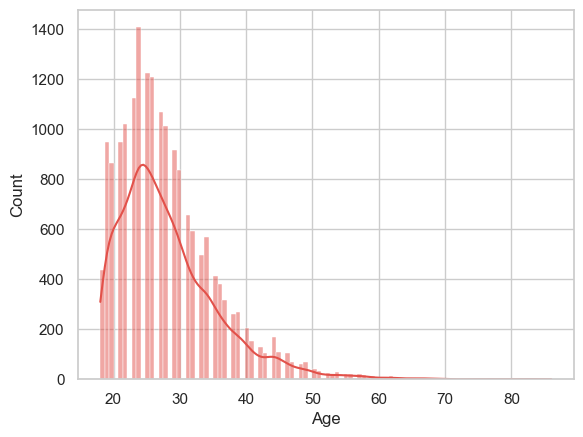

In [55]:
sns.histplot(merged_df['age'], kde=True)
plt.xlabel('Age')

Text(0.5, 1.0, 'Count by age group')

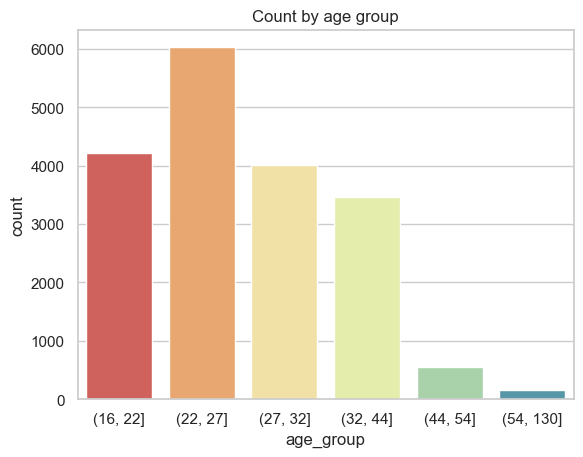

In [56]:
# plot age group counts
age_counts = merged_df['age_group'].value_counts().sort_index()
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['age_group', 'count']

sns.barplot(x='age_group', y='count', data=age_counts_df)
plt.title('Count by age group')

## Group

In [57]:
merged_df['group'].value_counts()

group
A    6382
C    6118
B    5924
Name: count, dtype: int64

In [58]:
group_verified = merged_df.groupby(['group', 'verified']).size().unstack()
group_verified_percent = group_verified.div(group_verified.sum(axis=1), axis=0) * 100
print(group_verified_percent.round(2))

verified      0      1
group                 
A         12.68  87.32
B          7.19  92.81
C          7.18  92.82


In [91]:
group_verified

verified,0,1
group,,
A,809,5573
B,426,5498
C,439,5679


## Method

In [59]:
group_method= merged_df.groupby(['group', 'method']).size().unstack()
group_method_percent = group_method.div(group_method.sum(axis=1), axis=0) * 100
print(group_method_percent.round(2))

method     Sms  Whatsapp
group                   
A       100.00       NaN
B        88.74     11.26
C        36.17     63.83


In [60]:
group_method

method,Sms,Whatsapp
group,,
A,6382.0,NaN
B,5257.0,667.0
C,2213.0,3905.0


In [61]:
group_method_verified = merged_df.groupby(['group', 'method', 'verified']).size().unstack()
group_method_verified_percent = group_method_verified.div(group_method_verified.sum(axis=1), axis=0) * 100
print(group_method_verified_percent.round(2))

verified            0      1
group method                
A     Sms       12.68  87.32
B     Sms        7.02  92.98
      Whatsapp   8.55  91.45
C     Sms        4.65  95.35
      Whatsapp   8.60  91.40


In [62]:
group_method_verified

verified          0     1
group method             
A     Sms       809  5573
B     Sms       369  4888
      Whatsapp   57   610
C     Sms       103  2110
      Whatsapp  336  3569

## Gender

In [63]:
gender_verified = merged_df.groupby(['gender', 'verified']).size().unstack()
gender_verified_percent = gender_verified.div(gender_verified.sum(axis=1), axis=0) * 100
print(gender_verified_percent.round(2))

verified     0      1
gender               
F         7.93  92.07
M         9.80  90.20


In [64]:
gender_group = merged_df.groupby(['gender', 'group']).size().unstack()
gender_group_percent = gender_group.div(gender_group.sum(axis=1), axis=0) * 100
print(gender_group_percent.round(2))

group       A      B      C
gender                     
F       34.45  32.10  33.45
M       34.76  32.19  33.06


In [65]:
gender_group

group,A,B,C
gender,,,
F,2424,2259,2354
M,3958,3665,3764


In [66]:
gender_group_verified = merged_df.groupby(['gender', 'group', 'verified']).size().unstack()
gender_group_verified_percent = gender_group_verified.div(gender_group_verified.sum(axis=1), axis=0) * 100
print(gender_group_verified_percent.round(2))

verified          0      1
gender group              
F      A      11.51  88.49
       B       6.11  93.89
       C       5.99  94.01
M      A      13.39  86.61
       B       7.86  92.14
       C       7.92  92.08


In [67]:
gender_group_verified

verified        0     1
gender group           
F      A      279  2145
       B      138  2121
       C      141  2213
M      A      530  3428
       B      288  3377
       C      298  3466

## Age

In [68]:
age_group_verified = merged_df.groupby(['age_group', 'verified']).size().unstack()
age_group_verified_percent = age_group_verified.div(age_group_verified.sum(axis=1), axis=0) * 100
print(age_group_verified_percent.round(2))

verified       0      1
age_group              
(16, 22]   11.27  88.73
(22, 27]    8.36  91.64
(27, 32]    7.96  92.04
(32, 44]    8.38  91.62
(44, 54]   10.79  89.21
(54, 130]  16.77  83.23


In [69]:
age_group_verified

verified,0,1
age_group,,
"(16, 22]",475,3740
"(22, 27]",504,5524
"(27, 32]",319,3691
"(32, 44]",290,3170
"(44, 54]",60,496
"(54, 130]",26,129


In [70]:
age_group_group = merged_df.groupby(['age_group', 'group']).size().unstack()
aage_group_group_percent = age_group_group.div(age_group_group.sum(axis=1), axis=0) * 100
print(aage_group_group_percent.round(2))

group          A      B      C
age_group                     
(16, 22]   34.50  33.24  32.27
(22, 27]   34.95  32.15  32.90
(27, 32]   34.39  31.57  34.04
(32, 44]   34.68  31.56  33.76
(44, 54]   34.53  33.09  32.37
(54, 130]  32.26  27.74  40.00


In [71]:
age_group_group

group,A,B,C
age_group,,,
"(16, 22]",1454,1401,1360
"(22, 27]",2107,1938,1983
"(27, 32]",1379,1266,1365
"(32, 44]",1200,1092,1168
"(44, 54]",192,184,180
"(54, 130]",50,43,62


In [72]:
age_group_group_verified = merged_df.groupby(['age_group','group', 'verified']).size().unstack()
age_group_group_verified_percent = age_group_group_verified.div(age_group_group_verified.sum(axis=1), axis=0) * 100
print(age_group_group_verified_percent.round(2))


verified             0      1
age_group group              
(16, 22]  A      15.34  84.66
          B       9.14  90.86
          C       9.12  90.88
(22, 27]  A      11.96  88.04
          B       6.04  93.96
          C       6.81  93.19
(27, 32]  A      11.82  88.18
          B       5.92  94.08
          C       5.93  94.07
(32, 44]  A      10.83  89.17
          B       7.51  92.49
          C       6.68  93.32
(44, 54]  A      15.10  84.90
          B       9.78  90.22
          C       7.22  92.78
(54, 130] A      24.00  76.00
          B      13.95  86.05
          C      12.90  87.10


In [73]:
age_group_group_method = merged_df.groupby(['age_group','group', 'method']).size().unstack()
age_group_group_method_percent = age_group_group_method.div(age_group_group_verified.sum(axis=1), axis=0) * 100
print(age_group_group_method_percent.round(2))

method              Sms  Whatsapp
age_group group                  
(16, 22]  A      100.00      0.00
          B       88.87     11.13
          C       30.29     69.71
(22, 27]  A      100.00      0.00
          B       89.06     10.94
          C       38.53     61.47
(27, 32]  A      100.00      0.00
          B       88.94     11.06
          C       37.80     62.20
(32, 44]  A      100.00      0.00
          B       87.91     12.09
          C       36.90     63.10
(44, 54]  A      100.00      0.00
          B       87.50     12.50
          C       37.78     62.22
(54, 130] A      100.00      0.00
          B       90.70      9.30
          C       35.48     64.52


In [74]:
age_group_group_method

method            Sms  Whatsapp
age_group group                
(16, 22]  A      1454         0
          B      1245       156
          C       412       948
(22, 27]  A      2107         0
          B      1726       212
          C       764      1219
(27, 32]  A      1379         0
          B      1126       140
          C       516       849
(32, 44]  A      1200         0
          B       960       132
          C       431       737
(44, 54]  A       192         0
          B       161        23
          C        68       112
(54, 130] A        50         0
          B        39         4
          C        22        40

## Cost

In [ ]:
# Global unit price
method_cost = merged_df[merged_df['group'] !='A'].groupby(['method'])['cost'].mean()
method_cost

method
Sms         0.094256
Whatsapp    0.043557
Name: cost, dtype: float64

In [88]:
# method shares
group_method= merged_df[merged_df['group'] !='A'].groupby(['group', 'method']).size().unstack()
group_method_percent = group_method.div(group_method.sum(axis=1), axis=0)
print(group_method_percent.round(4))

method     Sms  Whatsapp
group                   
B       0.8874    0.1126
C       0.3617    0.6383


In [2]:
# 1 milion users analysis
# fixed global prices per method
p_SMS = 0.094256
p_WA  = 0.043557

# method shares per design
share_SMS_B, share_WA_B = 0.8874, 0.1126
share_SMS_C, share_WA_C = 0.3617, 0.6383

# weighted average cost per design
AvgCost_B = share_SMS_B * p_SMS + share_WA_B * p_WA
AvgCost_C = share_SMS_C * p_SMS + share_WA_C * p_WA

# difference and potential monthly saving for 1,000,000 users
saving_per_user = AvgCost_B - AvgCost_C
monthly_saving = saving_per_user * 1000000

print(f"AvgCost_B = ${AvgCost_B:.5f}")
print(f"AvgCost_C = ${AvgCost_C:.5f}")
print(f"Savings per user = ${saving_per_user:.5f}")
print(f"Monthly saving for 1,000,000 users = ${monthly_saving:.0f}")

AvgCost_B = $0.08855
AvgCost_C = $0.06189
Savings per user = $0.02665
Monthly saving for 1,000,000 users = $26652


In [85]:

method_group_cost = merged_df[merged_df['group'] !='A'].groupby(['group','method'])['cost'].count()
method_group_cost

group  method  
B      Sms         5257
       Whatsapp     666
C      Sms         2213
       Whatsapp    3905
Name: cost, dtype: int64

In [83]:
# Mean cost by method and group ( price is not fairly distributed )
method_group_cost_mean = merged_df[merged_df['group'] !='A'].groupby(['group','method'])['cost'].mean()
method_group_cost_mean

group  method  
B      Sms         0.099971
       Whatsapp    0.041917
C      Sms         0.080680
       Whatsapp    0.043837
Name: cost, dtype: float64

In [78]:
method_cost = merged_df[merged_df['group'] !='A'].groupby(['method'])['cost'].sum()
method_cost

method
Sms         704.090471
Whatsapp    199.099000
Name: cost, dtype: float64

In [79]:
method_cost = merged_df[merged_df['group'] !='A'].groupby(['method'])['cost'].count()
method_cost

method
Sms         7470
Whatsapp    4571
Name: cost, dtype: int64